In [40]:
import matplotlib.pyplot as plt
from pymongo import MongoClient
import json
import pandas as pd
import numpy as np
import math


#a.Create collections “flights” inside database “airline_delayDB”

def mongoimport(csv_path):

    flight_df=pd.read_csv(csv_path)
    payload=json.loads(flight_df.to_json(orient='records'))
    collection.delete_many({}) 
    collection.insert_many(payload)
    
if __name__ == "__main__":
    client=MongoClient("mongodb://localhost:27017")
    print(client)
    db=client['airline_delayDB']
    collection=db['flights']
    mongoimport('Flights_Delay.csv')
    
#b  Average arrival delay caused by airlines
    print('\n')
    avgerage_delay = collection.aggregate([
        {'$group' : {'_id' : 'null', 'avgerage_arrival_delay':{ '$avg' : '$ARRIVAL_DELAY'}}}, 
        {'$project' : {'_id' : 0}}])
    
    for item in avgerage_delay:
        print(item)



MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)


{'avgerage_arrival_delay': 7.545457931394093}


1 MONTH


,_id,avgerage_arrival_delay
0,29,0.079710
1,10,3.107353
2,17,-3.609600
3,23,-0.401384
4,13,5.151122
5,11,9.544980
6,12,19.913317
7,15,-0.509988
8,3,26.090561
9,7,13.591940


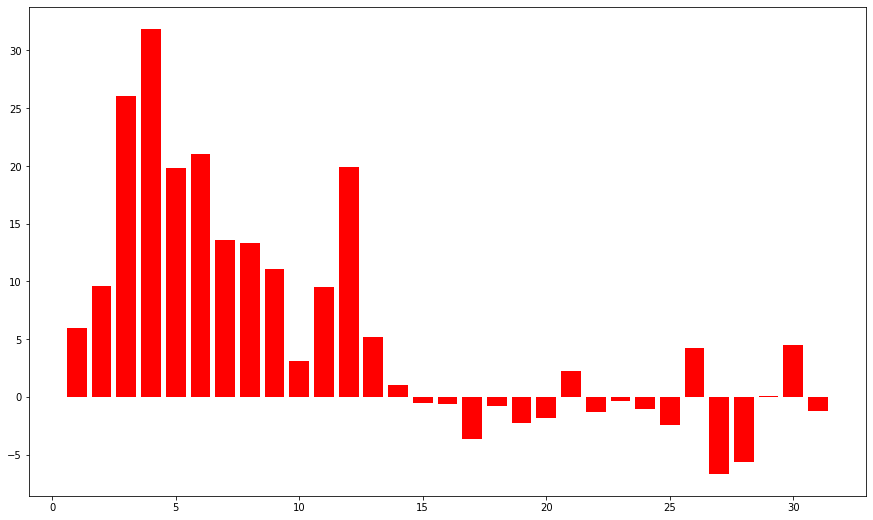



2 MONTH


,_id,avgerage_arrival_delay
0,14,1.724299
1,22,15.765957
2,6,-1.327811
3,9,1.376440
4,13,1.752432
5,25,11.839241
6,8,-0.726124
7,5,13.165259
8,21,13.066236
9,20,9.128146


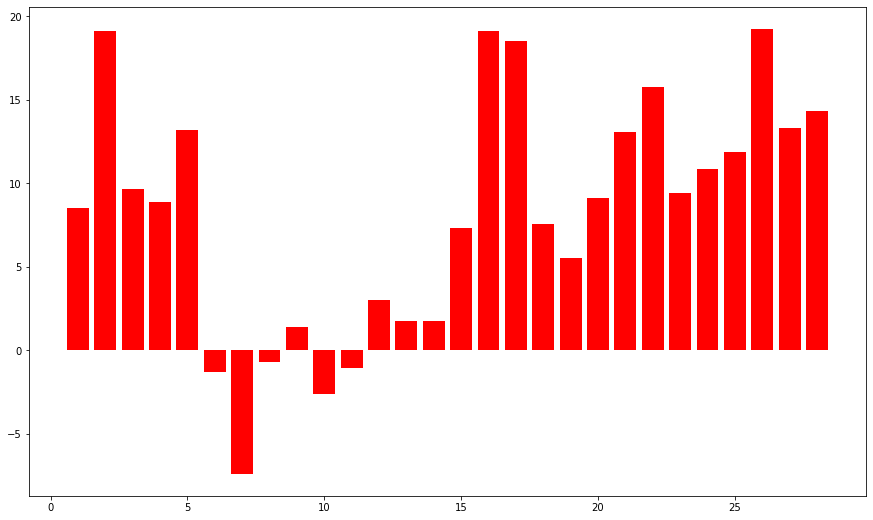



3 MONTH


,_id,avgerage_arrival_delay
0,10,-0.106227
1,1,28.921764
2,2,17.545238
3,9,0.476959
4,7,0.734748
5,8,2.458435
6,5,15.454031
7,3,18.743527
8,4,11.556750
9,6,12.648107


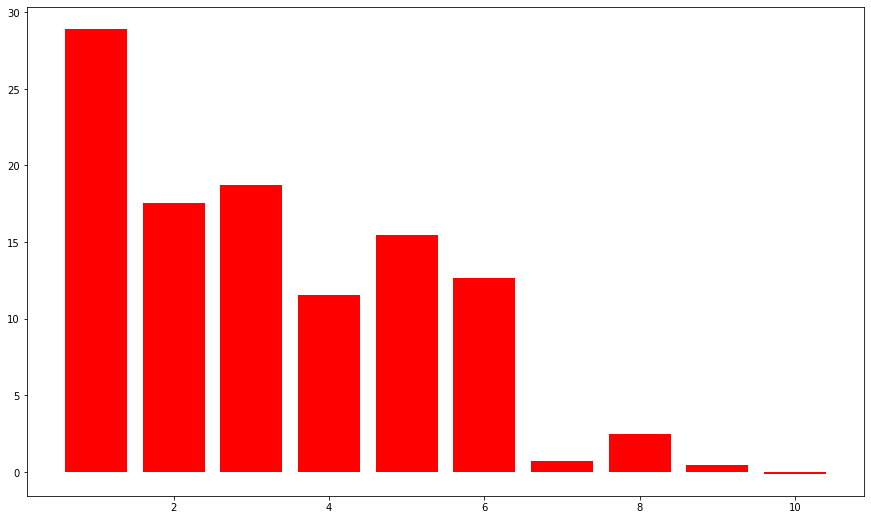

In [47]:
#c  Days of months with respect to average of arrival delays. [Create a suitable plot using matplotlib/seaborn]
    
    print('1 MONTH')
    plt.figure(figsize = (15,9))
    avgerage_delay1 = collection.aggregate([{'$match' : {'MONTH': 1}},
        {'$group' : {'_id' : '$DAY', 'avgerage_arrival_delay':{ '$avg' : '$ARRIVAL_DELAY'}}} 
        ])
    df=pd.DataFrame(avgerage_delay1)
    display(df)
    
    plt.bar(df['_id'], df['avgerage_arrival_delay'],color='red')
    plt.show()
    
    print('\n')
    print('2 MONTH')
    plt.figure(figsize = (15,9))
    avgerage_delay1 = collection.aggregate([{'$match' : {'MONTH': 2}},
        {'$group' : {'_id' : '$DAY', 'avgerage_arrival_delay':{ '$avg' : '$ARRIVAL_DELAY'}}} 
        ])
    df=pd.DataFrame(avgerage_delay1)
    display(df)
    
    plt.bar(df['_id'], df['avgerage_arrival_delay'],color='red')
    plt.show()
    
    print('\n')
    print('3 MONTH')
    plt.figure(figsize = (15,9))
    avgerage_delay1 = collection.aggregate([{'$match' : {'MONTH': 3}},
        {'$group' : {'_id' : '$DAY', 'avgerage_arrival_delay':{ '$avg' : '$ARRIVAL_DELAY'}}} 
        ])
    df=pd.DataFrame(avgerage_delay1)
    display(df)
    
    plt.bar(df['_id'], df['avgerage_arrival_delay'],color='red')
    plt.show()

,_id,avgerage_arrival_delay
0,3,11.343455
1,1,5.860943
2,2,8.122952


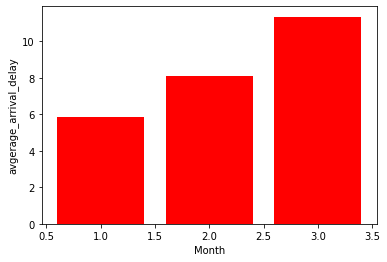

In [41]:
# OR

avgerage_delay1 = collection.aggregate([
        {'$group' : {'_id' : '$MONTH', 'avgerage_arrival_delay':{ '$avg' : '$ARRIVAL_DELAY'}}} 
        ])
df=pd.DataFrame(avgerage_delay1)  
display(df)
plt.bar(df['_id'], df['avgerage_arrival_delay'],color='red')
plt.xlabel('Month')
plt.ylabel('avgerage_arrival_delay')
plt.show()

,_id,avgerage_arrival_delay
0,1,10.807447
1,7,10.110840
2,2,8.033644
3,4,7.174969
4,5,6.010538
5,3,5.587079
6,6,4.888689


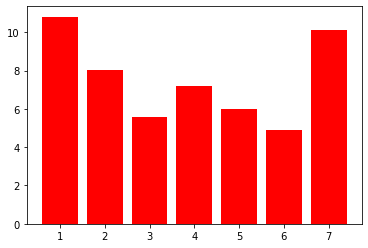

In [48]:
#d  Arrange weekdays with respect to the average arrival delays caused. [Create a suitable plot using matplotlib/seaborn]

print('\n')
avgerage_delay1 = collection.aggregate([{'$group' : {'_id' : '$DAY_OF_WEEK', 'avgerage_arrival_delay':{ '$avg' : '$ARRIVAL_DELAY'}}},
        {'$sort' : {'avgerage_arrival_delay':-1}}])
df=pd.DataFrame(avgerage_delay1)
display(df)
    
    
plt.bar(df['_id'], df['avgerage_arrival_delay'],color='red')
plt.show()

,_id,cancelled
0,1,237
1,5,215
2,2,195
3,27,185
4,26,114
5,4,113
6,28,98
7,9,89
8,3,88
9,15,83


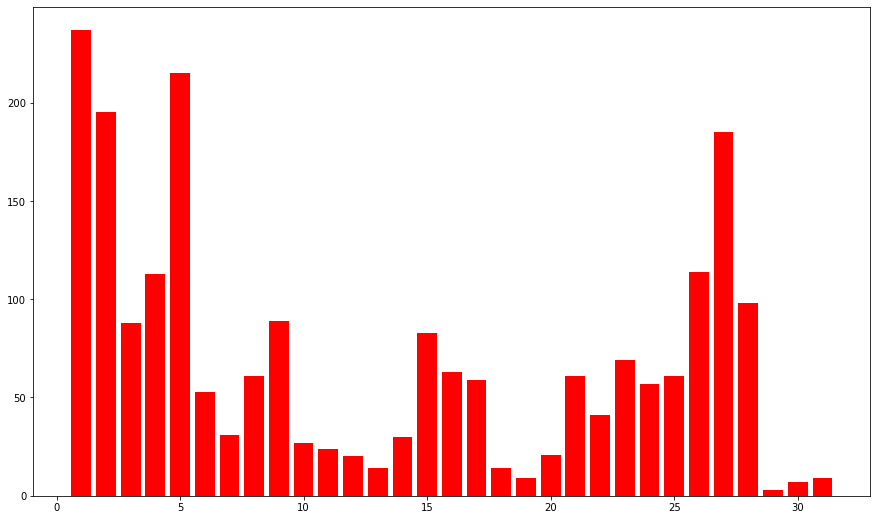

In [16]:
#e Arrange Days of month as per cancellations done in descending order.  [Create a suitable plot using matplotlib/seaborn]
print('\n')
plt.figure(figsize = (15,9))
avgerage_delay1 = collection.aggregate([{'$group' : {'_id' : '$DAY', 'cancelled':{ '$sum' : '$CANCELLED'}}},
        {'$sort' : {'cancelled':-1}}])
df=pd.DataFrame(avgerage_delay1)
display(df)  
plt.bar(df['_id'], df['cancelled'],color='red')
plt.show()

In [43]:
#f  Find the busiest airports with respect to day of week. Create a suitable plot using matplotlib/seaborn.

avgerage_delay1 = collection.aggregate([{'$group' : {'_id' :{'ORIGIN_AIRPORT':'$ORIGIN_AIRPORT','DAY_OF_WEEK':'$DAY_OF_WEEK'},
                                                     'totalcount':{'$count':{}}}},
                                        {'$sort':{'totalcount':-1}}])
df=pd.DataFrame(avgerage_delay1)
display(df)  


,_id,totalcount
0,"{'ORIGIN_AIRPORT': 'ATL', 'DAY_OF_WEEK': 5}",574
1,"{'ORIGIN_AIRPORT': 'ATL', 'DAY_OF_WEEK': 4}",556
2,"{'ORIGIN_AIRPORT': 'ATL', 'DAY_OF_WEEK': 1}",555
3,"{'ORIGIN_AIRPORT': 'ATL', 'DAY_OF_WEEK': 3}",505
4,"{'ORIGIN_AIRPORT': 'ATL', 'DAY_OF_WEEK': 7}",499
...,...,...
1926,"{'ORIGIN_AIRPORT': 'ABE', 'DAY_OF_WEEK': 2}",1
1927,"{'ORIGIN_AIRPORT': 'BQK', 'DAY_OF_WEEK': 2}",1
1928,"{'ORIGIN_AIRPORT': 'DBQ', 'DAY_OF_WEEK': 7}",1
1929,"{'ORIGIN_AIRPORT': 'OTZ', 'DAY_OF_WEEK': 7}",1


,_id,count
0,WN,11738
1,DL,7989
2,EV,5916
3,OO,5708
4,AA,5250
5,UA,4701
6,US,3925
7,MQ,3502
8,B6,2548
9,AS,1586


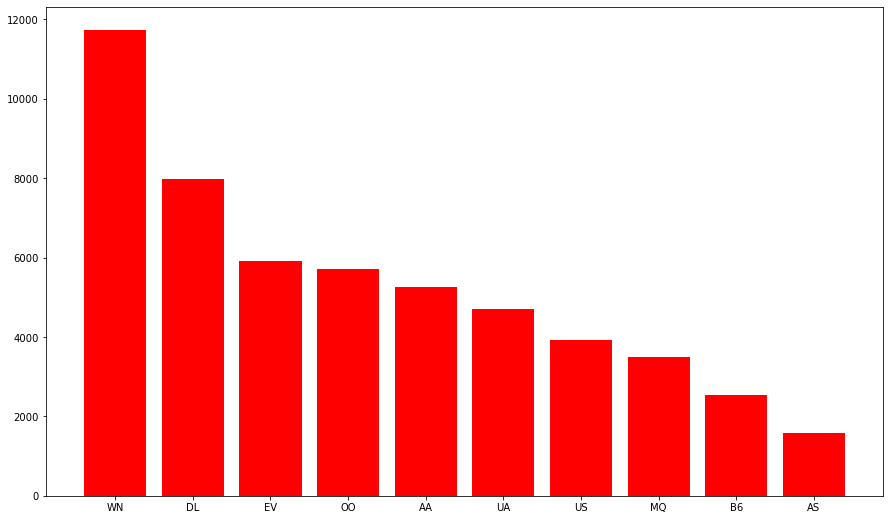

In [19]:
#g Find top 10 Airlines of US. Create a suitable plot using matplotlib/seaborn.

plt.figure(figsize = (15,9))
avgerage_delay1 = collection.aggregate([{'$group' : {'_id' : '$AIRLINE', 'count':{ '$count' : {}}}},
        {'$sort' : {'count':-1}},{'$limit':10}])
df=pd.DataFrame(avgerage_delay1)
display(df)  
plt.bar(df['_id'], df['count'],color='red')
plt.show()

In [29]:
#h  Finding airlines that make the maximum, minimum number of cancellations.

print('Maximum number of cancellation')
#plt.figure(figsize = (15,9))
avgerage_delay1 = collection.aggregate([{'$group' : {'_id' : '$AIRLINE', 'cancelled':{ '$sum' : '$CANCELLED'}}},
        {'$sort' : {'cancelled':-1}},{'$limit':1}])
df=pd.DataFrame(avgerage_delay1)
display(df)  
#plt.bar(df['_id'], df['cancelled'],color='red')
#plt.show()


print('\n')
print('Manimum number of cancellation')
#plt.figure(figsize = (15,9))
avgerage_delay1 = collection.aggregate([{'$group' : {'_id' : '$AIRLINE', 'cancelled':{ '$sum' : '$CANCELLED'}}},
        {'$sort' : {'cancelled':1}},{'$limit':1}])
df=pd.DataFrame(avgerage_delay1)
display(df)  

Maximum number of cancellation


,_id,cancelled
0,MQ,414




Manimum number of cancellation


,_id,cancelled
0,HA,3


,_id,diversions
0,WN,35
1,OO,25
2,EV,22
3,DL,18
4,B6,16
5,AA,12
6,US,9
7,UA,8
8,MQ,5
9,HA,1


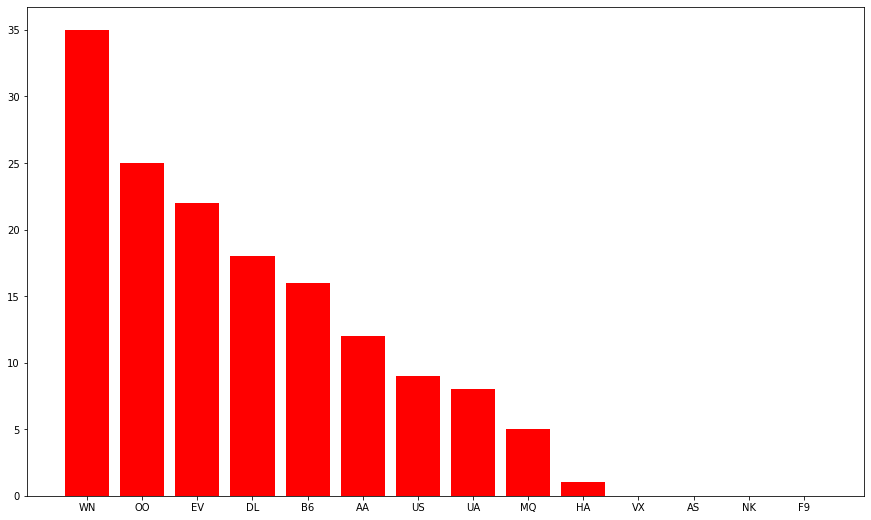

In [36]:
#i  Find and show airlines names in descending that make the most number of diversions made. [Create a suitable plot using matplotlib/seaborn]


plt.figure(figsize = (15,9))
avgerage_delay1 = collection.aggregate([{'$group' : {'_id' : '$AIRLINE', 'diversions':{ '$sum' : '$DIVERTED'}}},
        {'$sort' : {'diversions':-1}}])
df=pd.DataFrame(avgerage_delay1)
display(df) 
plt.bar(df['_id'], df['diversions'],color='red')
plt.show()



In [53]:
#j Finding days of month that see the most number of diversion
plt.figure(figsize = (15,9))
avgerage_delay1 = collection.aggregate([{'$group' : {'_id' : '$MONTH', 'diversions':{ '$sum' : '$DIVERTED'}}},
        {'$sort' : {'diversions':-1}},{'$limit':1}])
df=pd.DataFrame(avgerage_delay1)
display(df) 

,_id,diversions
0,2,60


<Figure size 1080x648 with 0 Axes>

In [10]:
#k  Calculating mean and standard deviation of departure delay for all flights in minutes

avg_delay1 = collection.find({},{'DEPARTURE_DELAY':1,'_id':0})
df = pd.DataFrame(avg_delay1)
print(df.mean())
print(df.std())

DEPARTURE_DELAY    11.329091
dtype: float64
DEPARTURE_DELAY    39.620916
dtype: float64


In [9]:
#l Calculating mean and standard deviation of arrival delay for all flights in minutes
avgerage_delay1 = collection.find({},{'ARRIVAL_DELAY':1,'_id':0})
df = pd.DataFrame(avgerage_delay1)
print(df.mean())
print(df.std())

ARRIVAL_DELAY    7.545458
dtype: float64
ARRIVAL_DELAY    42.378386
dtype: float64


In [18]:
#m Create a partitioning table “flights_partition” using partitioned by schema “CANCELLED”

flights_partition = collection.aggregate([{'$match' : {'CANCELLED': 1}}])
df=pd.DataFrame(flights_partition)
display(df)


,_id,ID,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,636531c9932251bcf4356233,64,2015,2,2,1,EV,6172,N12145,MLI,...,None,None,0,1,C,None,None,None,None,None
1,636531c9932251bcf4356248,85,2015,1,27,2,WN,3131,N8631A,BWI,...,None,None,0,1,B,None,None,None,None,None
2,636531c9932251bcf43562e4,241,2015,3,6,5,DL,414,N721TW,SFO,...,None,None,0,1,B,None,None,None,None,None
3,636531c9932251bcf43562f0,253,2015,2,23,1,AA,371,None,DFW,...,None,None,0,1,B,None,None,None,None,None
4,636531c9932251bcf43562ff,268,2015,2,18,3,MQ,3382,N527MQ,LGA,...,None,None,0,1,B,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2146,636531c9932251bcf4363c39,55878,2015,3,4,3,MQ,3463,N524MQ,LGA,...,None,None,0,1,B,None,None,None,None,None
2147,636531c9932251bcf4363c4b,55896,2015,2,25,3,AA,1233,N3BEAA,BOS,...,None,None,0,1,A,None,None,None,None,None
2148,636531c9932251bcf4363c6f,55932,2015,2,24,2,MQ,3623,N607MQ,DFW,...,None,None,0,1,B,None,None,None,None,None
2149,636531c9932251bcf4363c97,55972,2015,1,12,1,EV,5065,N974EV,SGF,...,None,None,0,1,B,None,None,None,None,None


In [16]:
#n Finding all diverted Route from a source to destination Airport & which route is the most diverted route.
print('\n')
print('All diverted Route from a source to destination Airport')
avgerage_delay1 = collection.aggregate([{'$match' : {'DIVERTED': 1}},
        {'$group' : {'_id' :{'ORIGIN_AIRPORT':'$ORIGIN_AIRPORT','DISTINATION_AIRPORT':'$DESTINATION_AIRPORT'},'totalcount':{'$count':{}}}},{'$sort':{'totalcount':-1}}])
df=pd.DataFrame(avgerage_delay1)
display(df)

print('\n')
print('Most diverted route: ')
avgerage_delay1 = collection.aggregate([{'$match' : {'DIVERTED': 1}},
        {'$group' : {'_id' :{'ORIGIN_AIRPORT':'$ORIGIN_AIRPORT','DISTINATION_AIRPORT':'$DESTINATION_AIRPORT'},'totalcount':{'$count':{}}}},{'$sort':{'totalcount':-1}},{'$limit':1}])
df=pd.DataFrame(avgerage_delay1)
display(df)



All diverted Route from a source to destination Airport


,_id,totalcount
0,"{'ORIGIN_AIRPORT': 'ORD', 'DISTINATION_AIRPORT...",2
1,"{'ORIGIN_AIRPORT': 'JFK', 'DISTINATION_AIRPORT...",2
2,"{'ORIGIN_AIRPORT': 'CLT', 'DISTINATION_AIRPORT...",2
3,"{'ORIGIN_AIRPORT': 'TPA', 'DISTINATION_AIRPORT...",2
4,"{'ORIGIN_AIRPORT': 'JFK', 'DISTINATION_AIRPORT...",2
...,...,...
137,"{'ORIGIN_AIRPORT': 'FLL', 'DISTINATION_AIRPORT...",1
138,"{'ORIGIN_AIRPORT': 'SFO', 'DISTINATION_AIRPORT...",1
139,"{'ORIGIN_AIRPORT': 'MCO', 'DISTINATION_AIRPORT...",1
140,"{'ORIGIN_AIRPORT': 'PHL', 'DISTINATION_AIRPORT...",1




Most diverted route: 


,_id,totalcount
0,"{'ORIGIN_AIRPORT': 'ORD', 'DISTINATION_AIRPORT...",2


In [31]:
#o When is the best time of day/day of week/time of a year to fly with minimum delays ?

avgerage_delay1 = collection.aggregate([{'$group' : {'_id' : '$DAY', 'Arrival_Delay':{ '$min' : '$ARRIVAL_DELAY'}}},{'$sort':{'Arrival_Delay':-1}},{'$limit':1}])
df=pd.DataFrame(avgerage_delay1)
display(df)  

,_id,Arrival_Delay
0,29,-40.0
